## This processes a cropped period of time for voltron recording of Fish_06152017_1-2

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=2)
sns.set_style("white")
%load_ext autoreload
%autoreload 2
import os, sys
fish_path = os.path.abspath(os.path.join('..'))
if fish_path not in sys.path:
    sys.path.append(fish_path)
from utils.memory import get_process_memory, clear_variables
# import dask.array as da
# from dask.array.image import imread
# from dask.distributed import wait, as_completed
# from utils.dask_ import setup_workers, terminate_workers

### Load data

In [ ]:
# folderName = '/nrs/ahrens/Takashi/06152017Fish1-2'
# imgFileName = 'registered.tif'
# imgFile = os.path.join(folderName, imgFileName)
# imgStack = imread(imgFile)

In [2]:
fishName = '06152017Fish1-2'

## 1. Pixel Denoising
## 2. Motion correction
* Above is done by TK

### 2.0 Crop a period of data from whole time series

In [ ]:
# time_ = imgStack.shape[1]//2
# period_ = 300*30 #  300 Hz -- 30 sec data
# Y = imgStack[:, time_:time_+period_,:, :].squeeze(axis=0)
# np.save(f'tmpData/{fishName}_period', Y)

In [ ]:
# Y = np.load(f'tmpData/{fishName}_period.npy')
# Y_ = Y.transpose([2,1,0])
# get_process_memory();

## 3. Local pca -- spatial denoising

### 3.1. Detrend corrected signal on pixels

In [ ]:
# from denoiseLocalPCA.detrend import trend
# from utils.np_mp import parallel_to_chunks

# n_split = 32
# Y_split = np.split(Y_, n_split, axis=0)
# get_process_memory();
# Y_trend = parallel_to_chunks(trend, Y_split)
# Y_trend = Y_trend[0]
# get_process_memory();
# Y_trend_ = tuple([_ for _ in Y_trend])
# Y_trend_ = np.concatenate(Y_trend_, axis=0)
# get_process_memory();
# Y_d = Y_ - Y_trend_
# np.save(f'tmpData/{fishName}_period_Y_d', Y_d)

In [ ]:
# Y_d = np.load(f'tmpData/{fishName}_period_Y_d.npy')
# get_process_memory();

### 3.2 Denoise using 2d SVD code

In [ ]:
# Y_d_ave = Y_d.mean(axis=-1, keepdims=True) # remove mean
# Y_d_std = Y_d.std(axis=-1, keepdims=True) # normalization
# Y_d = (Y_d - Y_d_ave)/Y_d_std

In [ ]:
# from denoiseLocalPCA.denoise import temporal as svd_patch
# nblocks=[10, 10]
# dx=4
# maxlag=5
# confidence=0.99
# greedy=False,
# fudge_factor=1
# mean_th_factor=1.15
# U_update=False
# min_rank=1
# stim_knots=None
# stim_delta=0

# Y_svd, _ = svd_patch(Y_d, nblocks=nblocks, dx=dx, stim_knots=stim_knots, stim_delta=stim_delta)

In [ ]:
# from trefide.video import play_cv2
# # play_cv2(np.hstack([Y_d, Y_svd, Y_d-Y_svd]), magnification=1, offset=0)
# play_cv2(np.hstack([Y_svd]), magnification=1, offset=0)

In [ ]:
# %%time
# from trefide.extras.util_plot import correlation_pnr
# Cn, _ = correlation_pnr(Y_svd, gSig=None, remove_small_val=False, remove_small_val_th=3, center_psf=False)
# plt.imshow(Cn)
# plt.colorbar()
# plt.show()

In [ ]:
# import caiman as cm
# mean_ = Y_svd.mean(axis=2,keepdims=True)
# sn, psdx = cm.source_extraction.cnmf.pre_processing.get_noise_fft(Y_svd - mean_,noise_method='logmexp')
# SNR_ = Y_svd.var(2)/sn**2
# plt.imshow(np.log(SNR_), aspect='auto')
# plt.axis('off')
# plt.show()

In [ ]:
# np.savez(f'tmpData/{fishName}_period_Y_2dsvd', Y_d=Y_d, Y_d_ave=Y_d_ave, Y_d_std=Y_d_std, Y_svd=Y_svd)

### 3.3 Denoise using 3d SVD code

#### 3.3.1 Add z-dimension

In [ ]:
# Y_d_ = Y_d[np.newaxis, :, :, :] # always keep z, x, y or z, y, x
# Y_d = None
# clear_variables(Y_d)
# get_process_memory();

#### 3.3.2 Standardize the data

In [ ]:
# Y_d_ave = Y_d_.mean(axis=-1, keepdims=True) # remove mean
# Y_d_std = Y_d_.std(axis=-1, keepdims=True) # normalization
# Y_d_ = (Y_d_ - Y_d_ave)/Y_d_std

#### 3.3.3 Make blocks

In [ ]:
# from denoiseLocalPCA.cdenoise import split_to_blocks, get_blocks_from_index_arr
# from denoiseLocalPCA.cdenoise import run_single_to_files, combine_blocks_from_files

In [ ]:
# dz, dx, dy, dt = Y_d_.shape
# nx = 10
# ny = 10
# zstack_step = 1
# nz = np.ceil(dz/zstack_step).astype('int')
# ox = dx//nx//2
# oy = dy//ny//2
# oz = 0
# arrs = split_to_blocks((dx, dy, dz), (nx, ny, nz), (ox, oy, oz))
# arrs = [arrs[2], arrs[0], arrs[1]]
# blocks = get_blocks_from_index_arr(Y_d_, arrs)

In [ ]:
# maxlag=5
# confidence=0.99
# greedy=False
# fudge_factor=1
# mean_th_factor=1.15
# U_update=False
# min_rank=1
# stim_knots=None
# stim_delta=0
# interleave=False
# tmp_files = f'tmpData/{fishName}_period_Y_svd/blocks_'

# run_single_to_files(blocks, tmp_files, maxlag=maxlag, confidence=confidence, 
#                     greedy=greedy, fudge_factor=fudge_factor, 
#                     mean_th_factor=mean_th_factor, U_update=U_update, 
#                     min_rank=min_rank, stim_knots=stim_knots, 
#                     stim_delta=stim_delta)

In [ ]:
# block_data_files = [tmp_files + '%06d.npz'%(nfile) for nfile in range(len(blocks))]
# block_mat, block_count, block_ranks = combine_blocks_from_files(block_data_files, Y_d_.shape, blocks)
# blocks = None
# clear_variables(blocks)
# get_process_memory();

#### 3.3.4 Sanity check for the blocks locations and its overlaps

In [ ]:
# plt.imshow(block_count[0, :, :, 0])
# plt.colorbar()
# plt.show()

#### 3.3.5 Convert 3d array to 2d array and save results

In [ ]:
# Y_svd = block_mat/block_count
# Y_svd_rank = block_ranks/block_count
# plt.imshow(Y_svd_rank[0, :, :, 0])
# plt.colorbar()
# plt.show()

In [ ]:
# np.savez(f'tmpData/{fishName}_period_Y_svd', 
#          Y_d=Y_d_.squeeze(axis=0), 
#          Y_d_ave=Y_d_ave.squeeze(axis=0), 
#          Y_d_std=Y_d_std.squeeze(axis=0), 
#          Y_svd=Y_svd.squeeze(axis=0), 
#          Y_svd_rank=Y_svd_rank.squeeze(axis=0))

#### 3.3.6 Check results

In [ ]:
# _ = np.load(f'tmpData/{fishName}_period_Y_svd.npz')
# Y_d_= _['Y_d']
# Y_d_ave_= _['Y_d_ave']
# Y_d_std_= _['Y_d_std']
# Y_svd_= _['Y_svd']
# Y_svd_rank_= _['Y_svd_rank']
# _=None
# clear_variables(_)
# get_process_memory();

In [ ]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib import animation
# mov_detrend = -(Y_d*Y_d_std+Y_d_ave)
# mov_denoise = -(Y_svd*Y_d_std+Y_d_ave)
# mov_noise = mov_detrend-mov_denoise
# movs = [mov_detrend, mov_denoise, mov_noise]
# titles = ['Detrended raw data', 'Denoised', 'Noise']
# get_process_memory();
# max_ = [np.percentile(_, 99) for _ in movs]
# min_ = [np.percentile(_, 1) for _ in movs]
# fig, axs = plt.subplots(1,3, figsize=(10, 4))
# axs = axs.flatten()

# for mdx in range(len(axs)):
#     axs[mdx].set(title=titles[mdx])
#     axs[mdx].title.set_fontsize(15)
#     axs[mdx].title.set_fontweight("bold")
#     axs[mdx].set_axis_off()
#     axs[mdx].set_xticklabels([])
#     axs[mdx].set_yticklabels([])
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.1, hspace=0.1)

# imgs = [ax.imshow(movs[mdx][:,:, 0].T, vmin=min_[mdx], vmax=max_[mdx], cmap="Greys_r") for mdx, ax in enumerate(axs)]

In [ ]:
# from matplotlib.animation import FFMpegFileWriter
# def update(i):
#     for mdx in range(len(axs)):
#         imgs[mdx].set_data(movs[mdx][:,:,i].T);
#     return imgs

# num_frames = 6000 #Y_svd.shape[-1]
# fps = 30
# filename = f'tmpMovie/{fishName}_period.mp4'
# ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=True);
# mywriter = FFMpegFileWriter(fps=fps,codec="h264")
# ani.save(filename, writer=mywriter)

In [ ]:
# plt.imshow(Y_svd_rank[:, :, 0])
# plt.colorbar()
# plt.show()

In [ ]:
# from trefide.extras.util_plot import correlation_pnr

In [ ]:
# %%time
# Cn, _ = correlation_pnr(Y_d, gSig=None, remove_small_val=False, remove_small_val_th=3, center_psf=False)
# plt.imshow(Cn)
# plt.colorbar()
# plt.show()

In [ ]:
# %%time
# Cn_, _ = correlation_pnr(Y_svd_, gSig=None, remove_small_val=False, remove_small_val_th=3, center_psf=False)
# plt.imshow(Cn)
# plt.colorbar()
# plt.show()

In [ ]:
# import caiman as cm
# mean_ = Y_svd_.mean(axis=2,keepdims=True)
# sn, psdx = cm.source_extraction.cnmf.pre_processing.get_noise_fft(Y_svd_ - mean_,noise_method='logmexp')
# SNR_ = Y_svd_.var(2)/sn**2
# plt.imshow(SNR_, aspect='auto')
# plt.show()

In [ ]:
# Y = np.load(f'tmpData/{fishName}_period.npy')
# Y_ = Y.transpose([2,1,0])
# plt.imshow(Y_.mean(axis=-1))
# plt.colorbar()
# plt.show()

### 3.4 PMD denoiser

In [ ]:
# # Denoising dependencies
# from trefide.pmd import batch_decompose,\
#                         batch_recompose,\
#                         overlapping_batch_decompose,\
#                         overlapping_batch_recompose,\
#                         determine_thresholds
# from trefide.reformat import overlapping_component_reformat
# # Plotting & Video Rendering Dependencies
# import funimag
# from trefide.plot import pixelwise_ranks
# from trefide.video import play_cv2

#### 3.4.1 Remove indivisible boundary

In [ ]:
# fov_height, fov_width, num_frames = Y_d.shape

In [ ]:
# # Maximum of rank 50 blocks (safeguard to terminate early if this is hit)
# max_components = 100
# # Enable Decimation 
# max_iters_main = 100
# max_iters_init = 400
# d_sub=2
# t_sub=2
# # Defaults
# consec_failures = 3
# tol = 0.0005
# # Set Blocksize Parameters
# block_height = 20
# block_width = 20

In [ ]:
# res_height = fov_height%block_height
# res_width = fov_width%block_width
# h_ = res_height//2
# w_ = res_width//2 
# Y_d_ = Y_d[h_:fov_height-(res_height-h_), w_:fov_width-(res_width-w_),:]
# fov_height_, fov_width_, num_frames = Y_d_.shape
# Y_d_ = np.asarray(Y_d_,order='C',dtype=np.float64)

#### 3.4.2 Generate thresholds for noise

In [ ]:
# spatial_thresh, temporal_thresh = determine_thresholds((fov_height_, fov_width_, num_frames),
#                                                        (block_height, block_width),
#                                                        consec_failures, max_iters_main, 
#                                                        max_iters_init, tol, 
#                                                        d_sub, t_sub, 5, True)

#### 3.4.3 PMD

In [ ]:
# %%time
# spatial_components, temporal_components,\
# block_ranks, block_indices, block_weights = overlapping_batch_decompose(fov_height_, fov_width_, num_frames,
#                                                                         Y_d_, block_height, block_width,
#                                                                         spatial_thresh, temporal_thresh,
#                                                                         max_components, consec_failures,
#                                                                         max_iters_main, max_iters_init, tol,
#                                                                         d_sub=d_sub, t_sub=t_sub)

In [ ]:
# pixelwise_ranks(block_ranks['no_skew']['full'], fov_height_, fov_width_, num_frames, block_height, block_width)

#### 3.4.4 Check results

In [ ]:
# Y_d_denoised = np.asarray(overlapping_batch_recompose(fov_height_, fov_width_, num_frames, block_height, block_width,
#                                                       spatial_components, temporal_components, block_ranks,
#                                                       block_indices, block_weights))

In [ ]:
# from trefide.extras.util_plot import correlation_pnr
# Cn_, _ = correlation_pnr(Y_d_denoised, gSig=None, remove_small_val=False, remove_small_val_th=3, center_psf=False)

In [ ]:
# tmp_ = [Y_d_, Y_d_denoised, Y_d_ - Y_d_denoised]
# titles = ['Detrended raw data', 'Denoised', 'Noise']

In [ ]:
# import caiman as cm
# f, ax = plt.subplots(len(tmp_), 1, figsize=(5, 8))
# for nPlt in range(len(tmp_)):
#     Y_ = tmp_[nPlt]
#     mean_ = Y_.mean(axis=2,keepdims=True)
#     sn, psdx = cm.source_extraction.cnmf.pre_processing.get_noise_fft(Y_ - mean_,noise_method='logmexp')
#     SNR_ = Y_.var(2)/sn**2
#     cf = ax[nPlt].imshow(np.log(SNR_), aspect='auto')
#     ax[nPlt].set(title=titles[nPlt])
#     ax[nPlt].title.set_fontsize(15)
#     ax[nPlt].title.set_fontweight("bold")
#     ax[nPlt].set_axis_off()
#     ax[nPlt].set_xticklabels([])
#     ax[nPlt].set_yticklabels([])
#     f.colorbar(cf, ax=ax[nPlt])
# plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0.1)
# plt.show()

In [ ]:
# play_cv2(np.vstack([Y_d_, Y_d_denoised, Y_d_-Y_d_denoised]), magnification=1, offset=3)

In [ ]:
# from skimage.external.tifffile import imsave
# imsave('temp.tif', Y_d_denoised.transpose((2, 0, 1)))

#### 3.3.5 Save results

In [ ]:
# U, V = overlapping_component_reformat(fov_height_, fov_width_, num_frames, block_height, block_width, spatial_components,
#                                       temporal_components, block_ranks, block_indices, block_weights)

In [ ]:
# np.savez(f"tmpData/{fishName}_period_Y_PMD.npz", U=U, V=V, Y_d_denoised=Y_d_denoised, block_ranks=block_ranks, 
#          block_height=block_height, block_width=block_width)

## 4. Demix

### 4.1 Demix based svd denoiser

In [3]:
_ = np.load(f'tmpData/{fishName}_period_Y_2dsvd.npz')
Y_d= _['Y_d']
Y_d_ave= _['Y_d_ave']
Y_d_std= _['Y_d_std']
Y_svd= _['Y_svd']
_=None
clear_variables(_)
get_process_memory();

RAM used 15.7290 GB
RAM used 15.7290 GB
clear_variables: memory before: 15.728950500488281, after: 15.728950500488281, consumed: 0.0; exec time: 00:00:00
RAM used 15.7290 GB


In [4]:
Y = None
Y_= None
Y_d= None
clear_variables((Y, Y_, Y_d))
get_process_memory();

RAM used 7.9184 GB
RAM used 7.9184 GB
clear_variables: memory before: 7.918399810791016, after: 7.918399810791016, consumed: 0.0; exec time: 00:00:00
RAM used 7.9184 GB


In [5]:
from funimag import superpixel_analysis as sup
from utils.demix import recompute_nmf

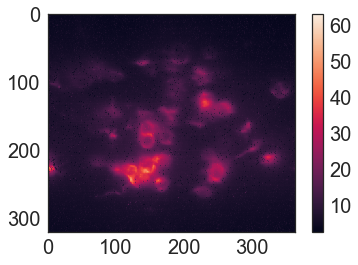

In [6]:
plt.imshow(Y_d_std[:, :, 0])
plt.colorbar()
plt.show()

In [7]:
from trefide.extras.util_plot import correlation_pnr

In [8]:
%%time
mov_ = Y_svd*Y_d_std + np.random.normal(size=Y_svd.shape)*0.7
Cn, _ = correlation_pnr(-mov_, gSig=None, remove_small_val=False, remove_small_val_th=3, center_psf=False)

CPU times: user 2min 28s, sys: 17.5 s, total: 2min 45s
Wall time: 2min 45s


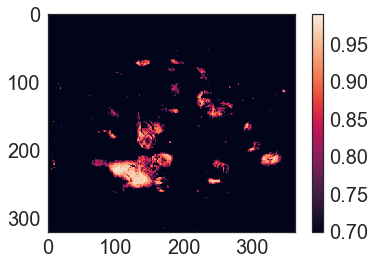

In [9]:
plt.imshow(Cn, vmin=0.7)
plt.colorbar()
plt.show()

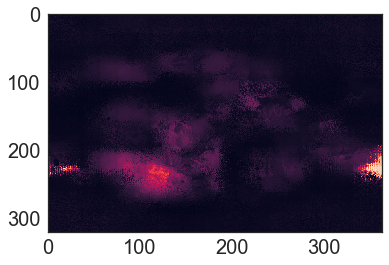

In [10]:
import caiman as cm
mean_ = Y_svd.mean(axis=2,keepdims=True)
sn, psdx = cm.source_extraction.cnmf.pre_processing.get_noise_fft(Y_svd - mean_,noise_method='logmexp')
SNR_ = Y_svd.var(2)/sn**2
plt.imshow(SNR_, aspect='auto')
plt.show()

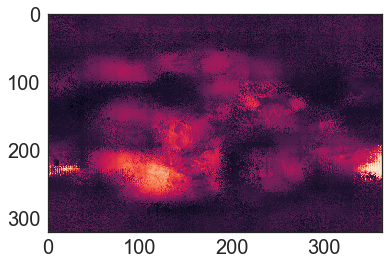

In [17]:
plt.imshow(np.log(SNR_), aspect='auto')
plt.show()

In [11]:
# %%time
# pass_num = 3
# rlt_= sup.demix_whole_data(-mov_, cut_off_point=[0.9,0.7,0.5,0.5], length_cut=[25,25,25,25], 
#                            th=[2,2,1,1], pass_num=pass_num, residual_cut = [0.6,0.6,0.6,0.6], 
#                            corr_th_fix=0.3, max_allow_neuron_size=0.2, merge_corr_thr=0.35, 
#                            merge_overlap_thr=0.6, num_plane=1, patch_size=[100, 100], plot_en=False, 
#                            TF=False, fudge_factor=1, text=False, bg=False, max_iter=60, 
#                            max_iter_fin=100, update_after=4)

In [12]:
# import pickle
# with open(f'tmpData/{fishName}_period_Y_demix_rlt.pkl', 'wb') as file_:
#     pickle.dump(rlt_, file_)

In [13]:
import pickle
with open(f'tmpData/{fishName}_period_Y_demix_rlt.pkl', 'rb') as f:
    rlt_ = pickle.load(f)

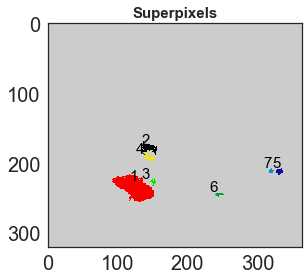

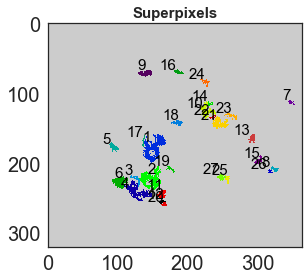

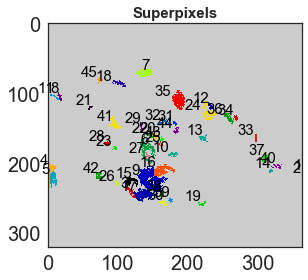

In [16]:
pass_num=3
for n_pass in range(pass_num):
    sup.pure_superpixel_single_plot(rlt_["superpixel_rlt"][n_pass]["connect_mat_1"],
                                    rlt_["superpixel_rlt"][n_pass]["unique_pix"],
                                    rlt_["superpixel_rlt"][n_pass]["brightness_rank_sup"],
                                    text=True,
                                    pure=False);
    plt.show()

In [23]:
# # Y = np.load(f'tmpData/{fishName}_period.npy')
# # Y_ = Y.transpose([2,1,0])
# A = rlt_['fin_rlt']['a']
# A_ = A[:, (A>0).sum(axis=0)>0] # min pixel = 40
# A_comp = np.zeros(A_.shape[0])
# A_comp[A_.sum(axis=-1)>0] = np.argmax(A_[A_.sum(axis=-1)>0, :], axis=-1) + 1
# d1, d2, _ = Y_svd.shape
# plt.figure(figsize=(15,15))
# # plt.imshow(Y_.mean(axis=-1), cmap=plt.cm.gray)
# plt.imshow(A_comp.reshape(d2, d1).T, cmap=plt.cm.nipy_spectral_r, alpha=1.0)
# # plt.title('Components')
# plt.axis('off')
# plt.show()

### 4.2 Demix based on PMD denoiser using spatial and temporal components from denoiser

In [ ]:
# _ = np.load(f"tmpData/{fishName}_period_Y_PMD.npz")
# U = _['U']
# V = _['V']
# Y_d_denoised= _['Y_d_denoised']
# _=None
# clear_variables(_)
# get_process_memory();

In [ ]:
# if U.ndim ==3:
#     dims = U.shape
#     U = U.reshape((np.prod(dims[:-1]),dims[-1]), order='F')

In [ ]:
# from funimag import superpixel_analysis as sup

In [ ]:
# %%time
# pass_num=2
# rlt = sup.demix(-Y_d_denoised, U, V.T, cut_off_point=[0.95, 0.90], length_cut=[15, 15], th=[2, 2], pass_num=pass_num, residual_cut = [0.6, 0.6], 
#                 corr_th_fix=0.31, max_allow_neuron_size=0.3, merge_corr_thr=0.6, merge_overlap_thr=0.6, num_plane=1, 
#                 patch_size=[50,50], plot_en=False, TF=False, fudge_factor=1, text=True, bg=False, max_iter=50, 
#                 max_iter_fin=100, update_after=4)

In [ ]:
# Y = np.load(f'tmpData/{fishName}_period.npy')
# Y_ = Y.transpose([2,1,0])
# fov_height, fov_width, num_frames = Y_.shape
# block_height = 20
# block_width = 20
# res_height = fov_height%block_height
# res_width = fov_width%block_width
# h_ = res_height//2
# w_ = res_width//2 
# Y_ = Y_[h_:fov_height-(res_height-h_), w_:fov_width-(res_width-w_),:]
# fov_height_, fov_width_, num_frames = Y_.shape
# Y_ = np.asarray(Y_,order='C',dtype=np.float64)

# A = rlt['fin_rlt']['a']
# A_ = A[:, (A>0).sum(axis=0)>0] # min pixel = 40
# A_comp = np.zeros(A_.shape[0])
# A_comp[A_.sum(axis=-1)>0] = np.argmax(A_[A_.sum(axis=-1)>0, :], axis=-1) + 1
# d1, d2, _ = Y_.shape
# plt.imshow(Y_.mean(axis=-1), cmap=plt.cm.gray)
# plt.imshow(A_comp.reshape(d2, d1).T, cmap=plt.cm.nipy_spectral_r, alpha=0.5)
# # plt.title('Components')
# plt.axis('off')
# plt.show()

In [ ]:
# for n_pass in range(pass_num):
#     sup.pure_superpixel_single_plot(rlt["superpixel_rlt"][n_pass]["connect_mat_1"],
#                                     rlt["superpixel_rlt"][n_pass]["unique_pix"],
#                                     rlt["superpixel_rlt"][n_pass]["brightness_rank_sup"],
#                                     text=True,
#                                     pure=False);
#     plt.show()

## 5. Generate movies

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import animation

In [25]:
from utils.demix import recompute_nmf
_ = np.load(f'tmpData/{fishName}_period_Y_2dsvd.npz')
Y_d= _['Y_d']
Y_ave=_['Y_d_ave']
Y_amp=_['Y_d_std']
Y_svd=_['Y_svd']
_=None
mov_detrend = -(Y_d*Y_amp+Y_ave)
mov_denoise = -(Y_svd*Y_amp+Y_ave)
mov_noise = mov_detrend-mov_denoise
A_ = rlt_['fin_rlt']['a']
C_, b_, res_ = recompute_nmf(rlt_=rlt_, mov=-Y_svd*Y_amp)
mov_signal = np.matmul(A_, C_).reshape(mov_detrend.shape, order='F')
mov_background = b_
mov_res = res_
clear_variables(_)
get_process_memory();

RAM used 64.0946 GB
RAM used 64.0946 GB
clear_variables: memory before: 64.09455108642578, after: 64.09455108642578, consumed: 0.0; exec time: 00:00:00
RAM used 64.0946 GB


In [30]:
movs = [mov_detrend-mov_detrend.min(axis=-1, keepdims=True), 
        mov_denoise-mov_denoise.min(axis=-1, keepdims=True), 
        mov_noise, 
        mov_signal - mov_signal.min(axis=-1, keepdims=True), 
        mov_background, 
        mov_res]
# movs = [mov_detrend, 
#         mov_denoise, 
#         mov_noise, 
#         mov_signal, 
#         mov_background, 
#         mov_res]
titles = ['Detrended raw data', 'Denoised', 'Noise', 'Signal', 'Background', 'Residual']
get_process_memory();

RAM used 87.5265 GB


In [31]:
A = rlt_['fin_rlt']['a']
A_ = A[:, (A>0).sum(axis=0)>40] # min pixel = 40
A_comp = np.zeros(A_.shape[0])
A_comp[A_.sum(axis=-1)>0] = np.argmax(A_[A_.sum(axis=-1)>0, :], axis=-1) + 1
d1, d2, _ = Y_svd.shape

In [32]:
max_ = [np.percentile(_, 99) for _ in movs]
min_ = [np.percentile(_, 1) for _ in movs]

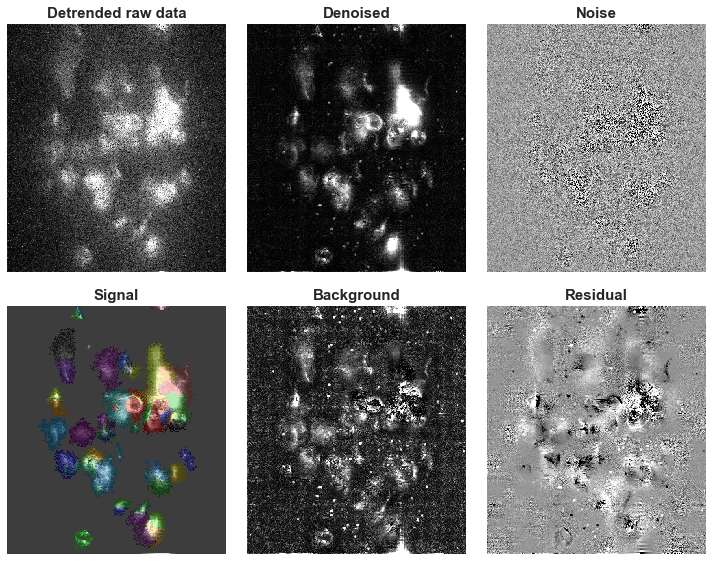

In [33]:
fig, axs = plt.subplots(2,3, figsize=(10, 8))
axs = axs.flatten()

for mdx in range(6):
    axs[mdx].set(title=titles[mdx])
    axs[mdx].title.set_fontsize(15)
    axs[mdx].title.set_fontweight("bold")
#     if mdx>0:
    axs[mdx].set_axis_off()
    axs[mdx].set_xticklabels([])
    axs[mdx].set_yticklabels([])
# axs[5].set(title=titles[5] + " Frame: {}".format(0))
# axs[5].title.set_fontsize(15)
# axs[5].title.set_fontweight("bold")
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)

axs[3].imshow(A_comp.reshape(d2, d1), cmap=plt.cm.nipy_spectral_r)
imgs = [ax.imshow(movs[mdx][:,:, 0].T, vmin=min_[mdx], vmax=max_[mdx], cmap="Greys_r") for mdx, ax in enumerate(axs)]
imgs[3].set_alpha(0.7)

In [ ]:
from matplotlib.animation import FFMpegFileWriter
def update(i):
    for mdx in [0, 1, 2, 3, 5]:
        imgs[mdx].set_data(movs[mdx][:,:,i].T);
#     axs[5].set(title=titles[5] + " Frame: {}".format(i))
#     axs[5].title.set_fontsize(15)
#     axs[5].title.set_fontweight("bold")
    return imgs

num_frames = 3000 #Y_svd.shape[-1]
fps = 30
filename = f'tmpMovie/{fishName}_period.mp4'
ani = animation.FuncAnimation(fig, update, frames=num_frames, blit=True);
mywriter = FFMpegFileWriter(fps=fps,codec="h264")
ani.save(filename, writer=mywriter)

## 6. Spike detection

In [ ]:
A = rlt_['fin_rlt']['a']
A_ = A[:, (A>0).sum(axis=0)>40] # min pixel = 40
A_comp = np.zeros(A_.shape[0])
A_comp[A_.sum(axis=-1)>0] = np.argmax(A_[A_.sum(axis=-1)>0, :], axis=-1) + 1
d1, d2, _ = Y_svd.shape
Y = np.load(f'tmpData/{fishName}_period.npy')
Y_ = Y.transpose([2,1,0])
plt.figure(figsize=(15, 15))
plt.imshow(Y_.mean(axis=-1))
plt.imshow(A_comp.reshape(d2, d1).T, cmap=plt.cm.nipy_spectral_r, alpha=0.9)
for n, nA in enumerate(A_.T):
    nA = nA.reshape(d2, d1).T
    pos = np.where(nA>0);
    pos0 = pos[0];
    pos1 = pos[1];
    plt.text(pos1.mean(), pos0.mean(), f"{n}", fontsize=15)
plt.title('Components')
plt.axis('off')
plt.show()

In [ ]:
mov = Y_svd*Y_amp
C_, b_, res_ = recompute_nmf(rlt_=rlt_, mov=-mov, comp_thres=40)

In [ ]:
plt.figure(figsize=(20, 4))
nNeuron = 3
plt.plot(np.arange(9000)/300, C_[nNeuron,:])
plt.xlim([0, 30])
plt.xlabel('Time (sec)')
sns.despine()
plt.show()

### 6.1 Spike detection

In [ ]:
from trefide.temporal import TrendFilter
nNeuron = 0
voltr_ = C_[nNeuron,:]/C_[nNeuron,:].mean()-1
voltr_ = voltr_/20
filters = TrendFilter(len(voltr_))
denoised_voltr = filters.denoise(voltr_)
plt.figure(figsize=(20, 4))
plt.plot(voltr_*100)
# plt.plot(denoised_voltr)
plt.ylabel(r'$\Delta$ F/F (%)')
plt.xlabel('Frame')
plt.xlim([0, 6000])
sns.despine()
plt.show()

In [ ]:
from keras.models import load_model
from spikeDetectionNN.spikeDetector import prepare_sequences
from spikeDetectionNN.utils import detected_peak_spikes, plot_spks
from glob import glob

In [ ]:
window_length = 40
trained_model = sorted(glob('tmpData/partly_trained_spikeDetector_20*.h5'))[-1]
m = load_model(trained_model)
spk = np.zeros(voltr_.shape)
x_, contain_outliers_ = prepare_sequences(voltr_, spk, window_length)
spk_ = detected_peak_spikes(m, x_, voltr_, thres=0.6, devoltr_ = denoised_voltr, 
                            peakThres=.9, peak_minDist=10, smallPeakThres = 40)

In [ ]:
plt.figure(figsize=(20, 2))
plot_spks(plt, spk_, voltr_.max(), label='Detected spike time')
plt.plot(voltr_,'-k')
plt.xlabel('Frame')
plt.xlim([0, 9000])
# plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1))
sns.despine()
plt.show()

In [ ]:
tspk = np.where(spk_>0)[0]
tspk_win = tspk[:, None] + np.arange(-3, 3)[None, :]
tspk_win = tspk_win.reshape(-1)
nospike = np.zeros(spk_.shape)
nospike[tspk_win] = 1
tspk_ = np.where(nospike==0)[0]
int_voltr_ = voltr_.copy()
int_voltr_[tspk_win] = np.interp(tspk_win, tspk_, voltr_[tspk_])
denoised_voltr_ = filters.denoise(int_voltr_)

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(voltr_*100)
plt.plot(np.asarray(denoised_voltr_)*100)
plot_spks(plt, spk_, 10.2, label='Detected spike time')
plt.xlabel('Frame')
plt.ylabel(r'$\Delta$ F/F (%)')
plt.xlabel('Frame')
plt.xlim([6000, 9000])
# plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1))
sns.despine()
plt.savefig(f'tmpFigures/example_cell_voltron_sub_{fishName}.eps')